
# `Материалы кафедры ММП факультета ВМК МГУ. Введение в глубокое обучение.`

# `Лекция 05. Эмбединги слов, дистрибутивная гипотеза, word2ve`

### `Материалы составили Ким Роман, Оганов Александр`


#### `Москва, Весенний семестр 2025`

`Материалы`

- Часть материалов основана на курсе [Математические методы анализа текстов, кафедра ММП](https://github.com/mmta-team/mmta_2021_fall/blob/main/cmc/slides/02_word_embeddings.pdf)

- [Конспект по основам NLP](https://github.com/mmp-practicum-team/mmp_practicum_spring_2024/blob/main/Seminars/Seminar%2007/%D0%AF%D0%B7%D1%8B%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.%20Torchtext.ipynb), который подготовили: Феоктистов Дмитрий, Хисматуллин Владимир


- Часть материалов основана на [NLP Course](https://lena-voita.github.io/nlp_course.html)

- Для большинства изображений указан источник, откуда оно взято, как правило, являющийся статьей

В этом ноутбуке мы постараемся познакомиться с задачей обработки естественного языка (natural language processing/NLP). Обработка языка до недавних пор являлось крайне трудной задачей, мы постараемся пройти от простых статических методов к нейросетевым подходом.

Не стоит думать, что NLP ограничивается только большими моделями, в начале развития были использованы **колоссальные труды** лингвистов и людей с филологическим образованием. Гигантские команды формулировали различные логические правила на основе знаний о синтаксисе языка.

Например, вы можете изучить [национальный корпус русского языка](https://ruscorpora.ru/), в котором собирались знания многих специалистов о русском языке. Каждый текст имеет: стиль, автора, год, при этом корпус содержит более 2 миллиардов слов (что в **10000 раз больше**, чем в книге "Война и мир").

## `Примеры основных задач NLP на практике`

В области обработки языка существуют множество различных задач, но все их можно поделить на 2 категории:

- Дискриминативные (классификация, распознавание сущностей, похожесть текстов...)

- Генеративные (генерация текстов, условная генерация: перевод, чат-боты...)

Более подробная схема изображена ниже

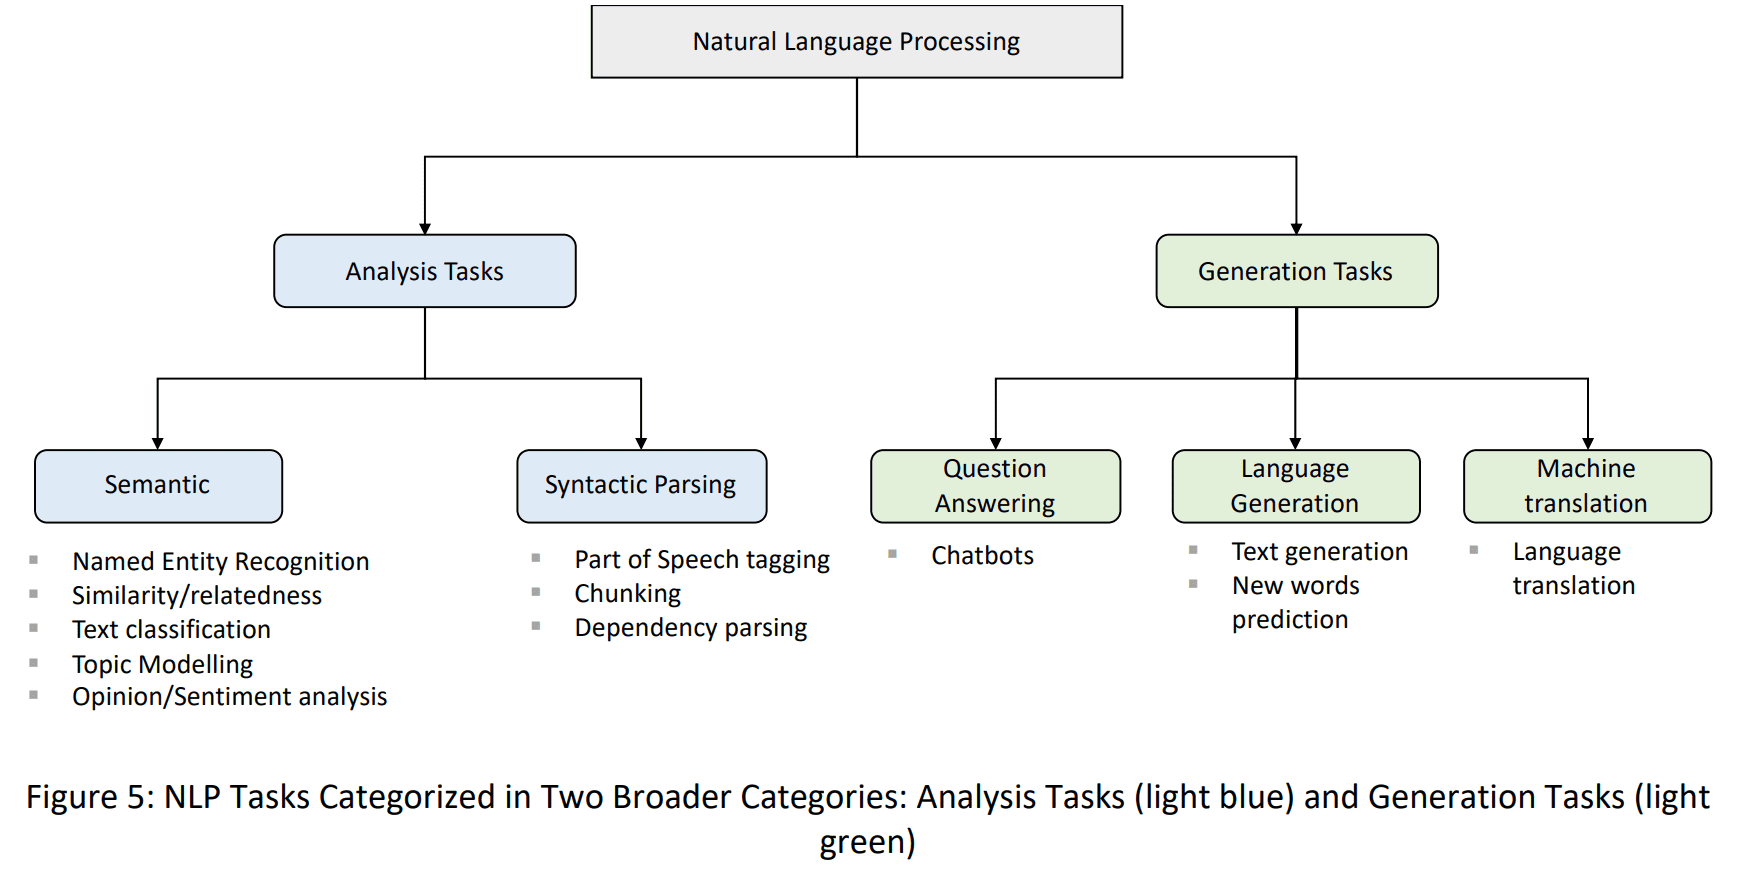

[Источник](https://www.researchgate.net/publication/343323519_Meshing_Capability_and_Threat-based_Science_and_Technology_ST_Resource_Allocation/figures?lo=1&utm_source=google&utm_medium=organic)

## `Языковые модели`

Прежде чем начать работать с языком, хочется формализовать задачу. Строгого математического формализма не существует, так как естественный язык тяжело формализовать, но мы всегда можем воспользоваться вероятностными моделями.

**Вопрос:** Что мы хотим от языковой модели?

### `Описание модели`


Предположим, что дана выборка документов $\{ d_1,\dots, d_N \}$. Каждый документ содержит слова $w_1, \dots, w_{L_{d}}$, где  $L_{d}$ число слов в документе $d$.

Заметим, что раньше мы работали с объектами, которые можно рассматривать как непрерывные объекты, например, изображения. В случае с языком важно, что слова **дискретные** и нам задан какой-то словарь $W$ всевозможных слов.

**Задача**

Необходимо для любого множества слов $(w_1, \ldots , w_k)$ оценить вероятность следующего слова в предложении, то есть найти условное распределение:


\begin{gather*}
p(w|w_1, . . . , w_k)
\end{gather*}

**Вопрос:** Допустим мы получили модель и научились считать условные распределения, как считать качество?

### `Метрики`
Когда мы говорим про вероятностные модели, то всегда можно оценивать качество через правдодобие тестовой выборки.

\begin{gather}
\mathcal{L}(D_{test}) = \prod_{d \in D_{test}}\prod_{n=1}^{|L_d|}p(w_n|w_1, \ldots , w_{n-1}) \text{ - правдоподобие}
\end{gather}

\begin{gather}
\mathcal{L}(D_{test}) = \prod_{d \in D_{test}} \left\{\prod_{n=1}^{|L_d|}p(w_n|w_1, \ldots , w_{n-1}) \right\}^{-\cfrac{1}{|L_d|}} \text{ - перплексия}
\end{gather}




**Важно:** Заметим, что для нашей модели не важно рассматривать именно слова или символы. Дальше вы узнаете о других способах кодирования, например, **BPE**. Если коротко, то это способ обрабатывать слова, которых наша моделька не видела через переход к буквенным n-граммам, которые составляются специальным образом.


### `Приложения`

Представим мы получили модель, которая идеально оценивает условные распределения. Приведите примеры, когда подобная постановка задачи может быть полезна.

&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
     <ul>
         <li>Исправление опечаток и грамматических ошибок:</li>
         $$
p(\text{'м', 'а', 'ш', 'и', 'н', 'а'}) \gg p(\text{'м', 'а', 'ш', 'ы', 'н', 'а'})
$$
         <li>Машинный перевод: сгенерировать наиболее вероятную последовательность на языке, на который нужен перевод, при условии, что мы наблюдаем последовательность на исходном языке</li>
         
         <li>Pretrain моделей. Нам не нужна дорогая разметка данных, чтобы заниматься языковым моделирование. В то же время знание о том, как связаны слова могут быть полезны для модели</li>
    </ul>
</details>

## `Классические подходы в языковых моделях `



Выше мы рассмотрели общую постановку, то есть сформулировали задачу как поиск $p(w|w_1, \ldots , w_k)$. Никто нас не обязывать смотреть на "слова" как на единицу конструкции "предложения".

### `N-граммные модели`

Будем считать N-граммы на уровне слов

\begin{align*}
p(d) &= \prod_{n=1}^{L_d}p(w_n| w_{n-1}, \ldots, w_{1}) = p(w_1) p(w_2|w_1) \ldots p(w_{N}|w_{N - 1}, \ldots, w_1)\prod_{n=N+1}^{L_d}p(w_n | w_{n-1}, \ldots, w_{1}) =\\
 &= p(w_1, w_2,\ldots, w_N) \prod_{n=N+1}^{L_d}p(w_n | w_{n-1}, \ldots, w_{1})
\end{align*}

Разумным предположением, что в какой-то момент слова в начале текста не особо влияют на слова в конце. Иными словами, мы предполагаем, что есть какой-то контекст в рамках, которого слова влияют друг на друга.

\begin{align*}
p(d) = p(w_1, w_2,\ldots, w_N) \prod_{n=N+1}^{L_d}p(w_n | w_{n-1}, \ldots, w_{1}) \approx p(w_1, w_2,\dots, w_N) \prod_{n=N+1}^{L_d}p(w_n|w_{n-1}, \dots, w_{n-N})
\end{align*}



Распределения можно оценивать частотно по всем N-граммам в корпусе документов.

$$
p(w|w_1, . . . , w_k ) = \cfrac{C(w_1, . . . , w_k , w)}{C(w_1, . . . , w_k )}
$$

#### `Какие проблемы у такой модели?`

&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
     <ul>
         <li>Проблема оценки первого слова в предложении.</li>
         <li> Проблема <b>Out-of-vocabulary</b> слов. Если слово w не встречалось в словаре, любая условная вероятность, содержащая в посылке w, будет равна 0.</li>
         <li>Чем больше N тем лучше учитываем контекст, но тем больше нулевых вероятностей.</li>
         <li>Сколько существует N-грамм от $K$ слов? По-хорошему $K^N$. Уже в самых простых задачах $K = 10^4 \implies$ модель невозможно хранить для $N>4$</li>
         <li>Предложения могут быть откровенным бредом, но каждая из n-грамм может быть осмысленной. Рассмотрим простой пример биграммной модели (N=2)</li>
         Рассмотрим простой пример: $d = (\text{Я}, \text{погладил}, \text{кота}, \text{нет}, \text{денег},\text{попросили})$

$$
  p(d) = p(\text{попросили}|\text{денег})p(\text{денег}|\text{нет})p(\text{нет}|\text{кота})p(\text{кота}|\text{погладил})p(\text{погладил}|\text{Я})p(\text{Я}|\text{<start>})
$$
    </ul>
</details>

#### `Некоторые идеи решения проблем`

Решение первой проблемы:

&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    
Предложение, для которого хотим оценить вероятность:
$d = (\text{Я}, \text{пошёл}, \text{в}, \text{магазин})$
Можно так:

$$p(d) = p(\text{магазин}|\text{в})p(\text{в}|\text{пошёл})p(\text{пошёл}|\text{Я})p(\text{Я})$$

Но лучше так:

$$p(d) = p(\text{магазин}|\text{в})p(\text{в}|\text{пошёл})p(\text{пошёл}|\text{Я})p(\text{Я}|\text{<start>})$$

Добавляем в начало каждого предложения токен \<start\>, чтобы лучше моделировать вероятности первых слов.

В общем случае
$$
p(d) = p(w_1|\text{<start>}) \prod_{n=2}^{N_d}p(w_n|w_{n-1})
$$
</details>


&nbsp;
    
Решение второй проблемы:
    
&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
   <ul>
    <li>Исправление нормировкой</li>
$$ p(w|w_1, \dots , w_n ) = \cfrac{C(w_1, \dots , w_n, w) + \alpha}{C(w_1, \dots , w_n) + α|W | }\text{, где } \alpha \text{ — мало}
$$

<li>Katz backoff. Основная идея: если не встречали $(k+1)$-грамму, но встречали $k$-грамму, то можем произвести 'откат'</li>

$$
C(w_{n-k}, \dots , w_n, w) =
     \begin{cases}
       C(w_{n-k}, \dots , w_n, w) \beta(w_{n-k}, \dots , w_n) &\quad \text{если}\quad C(w_{n-k}, \dots , w_n) > 0\\
       C(w_{n-k+1}, \dots , w_n, w)\alpha(w_{n-k}, \dots , w_n)  &\quad\text{иначе}
     \end{cases}
$$

Формула может раскрываться рекурсивно. Параметры $\alpha, \, \beta$ определяются из условия нормировки.
    </ul>
</details>



В базовом курсе машинного обучения для кодирования слов использовалась подход One-Hot-Encoding. При этом для уменьшения размерности мы выбрасывали самые частые и самые редкие слова. Для задач генерации и получения языковой модели, мы не можем исключить слова, а рассматривать вектора размерности $10^5$ слишком трудно.

Например, если в небольшой задаче размер корпуса (число слов) равно $10.000$, то первый слой в модели будет иметь размер $10.000 \times 100$. Что для решения небольшой задачи уже недопустимо много.

<div>
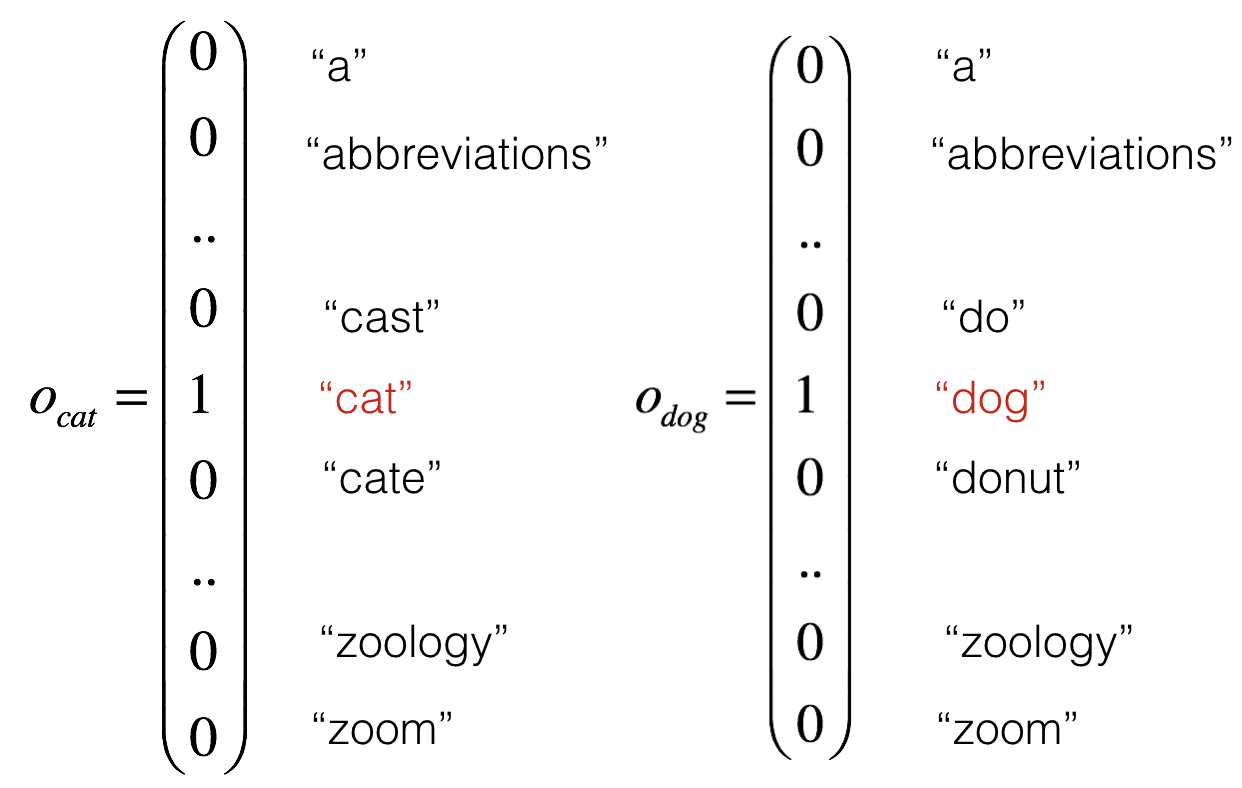
</div>

На практике используют более умные подходы для получения векторных представлений, именно их мы сейчас и обсудим.

## `Общая задача построения эмбеддингов`


Дано: $D = \{w_1, w_2, . . . , w_{L_d}\}_{d=1}^{d=N}$ - корпус текста, $w_i \in W$ - словарь всевозможных слов (едениц конструкции предложения)

Найти: векторное представление $v_w \in R^m$ для каждого слова $w$, где $ m << |W|$

**Вопрос:** Что мы хотим получить от векторных представлений?
&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
     <ul>
        Далее мы будем считать, что хорошие представления будут иметь:

        1. Соответствие близости по смыслу слов к близости по расстоянию между векторами.
        2. Интерпретируемостью арифметических операции над словами в пространстве эмбеддингов.
        3. Хорошее качество при решении конечной задачи.

        На самом деле, мы хотим не просто уменьшить вектора, но и иметь векторное пространство с операциями сохраняющим "смысл" слов.

        Если мы сможем построить такие векторные представления, то **сразу решим задачи**:

        1. Поиск близких слов, синонимов и т.п.
        2. Получение представление документа, которое будет использоваться в других задачах машинного обучения.
        3. Использование в качестве фиксированного представления в сложной архитектуре (например, рекуррентной сети*)
        4. Использование для инициализации представлений в сложной архитектуре (снова рекуррентной сети*)

**Все эти аспекты рассмотрим на практике**

*Про рекуретные сети вы узнаете на следующей неделе

## `Гипотиза дистрибутивности`

Сделаем основное предположение, чтобы постараться хоть как-то подойти к задаче похожести контекста.

**Основная гипотеза (формулировка 1)** [Harris (1954). Distributional structure](https://www.tandfonline.com/doi/pdf/10.1080/00437956.1954.11659520)

Слова, совстречающиеся с одними и теми же словами, имеют схожее значение.

**Основная гипотеза (формулировка 2)** [Firth (1957). A synopsis of linguistic theory](https://www.scirp.org/reference/ReferencesPapers?ReferenceID=1846447)

Слово характеризуется словами, с которыми оно совстречается.


**Вопрос:** Как вы считаете, близка ли к реальности эта гипотеза? Какие примеры вы знаете, которые противоречат гипотезе? *Возможно вы изучали немецкий или другие языки*

### `Подход #1: Count-based`

Наша цель сохранить в векторах смыслы слов и контекста, кроме того мы хотим уменьшить размерность.

Если слова зависят друг от соседних слов (в каком-то контексте), тогда попробуем извлечь эту информацию.

Обозначим за $n_{u,v}$ количество раз, когда $u$ $v$ встречались вместе в одном контексте, то есть взиамодействовали, а за $n_{c}$ сколко раз встречалось слово $c$.

Если корпус текста достаточно большой и в нем $N$ слов, то вероятность встретить слово $w$ и встретить слова $w, u$ вместе можно записать так:

\begin{align*}
    &p(w) \approx \frac{n_w}{N}\\
    &p(w, v) \approx \frac{n_{w, v}}{N^2}
\end{align*}

Запишем чему равна взаимная информация двух слов (pointwise mutual information/PMI)*, что по смыслу отвечает на вопрос: "На сколько одно слово влияет на другое?".

\begin{align*}
    PMI(w, v) = \log \frac{p(w, v)}{p(w)p(v)} = \log \frac{n_{w, v}}{p(w)p(v)}
\end{align*}

Рассмотрим позитивную взаиманую информацию (Positive	PMI/PPMI):

\begin{align*}
    PPMI(w, v) = \max(0, PMI(w, v))
\end{align*}

Составим матрицу $X \in \mathbb{R}^{|W| \times |W|}$, где $X_{w, v} = PPMI(w, v)$.

**Вопрос:** Какая матрица это будет? Как это соотносится с реальным языком?

*Взаимная информация прошла из теории информация, любопытные могут прочитать об этом подробнее в соотвествующих книгах :)

Мы получили очень большую разреженную матрицу, в которой содержится полезная информация, теперь давайте уменьшим ее размер. Для этого воспользуемся методами понижения размерности, например, SVD разложением.

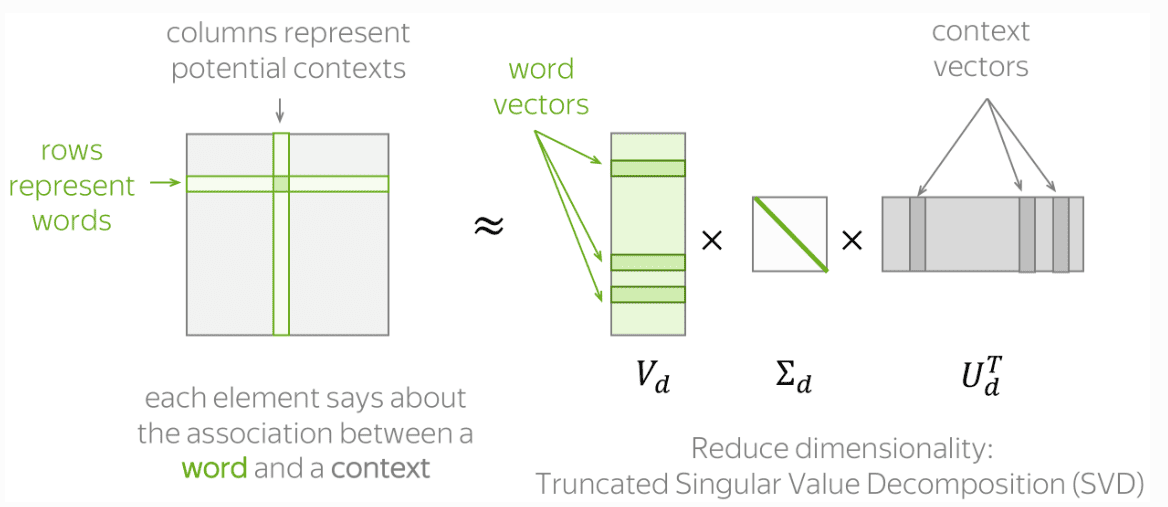

[Источник](https://lena-voita.github.io/nlp_course/word_embeddings.html)

Когда мы получили матрицу взаимодействий мы уже решили прикладную задачу. Задача уменьшения размерности матрицы с сохранением "информации" является задачей методов оптимизации (alternating least squares, ...) или линейной алгебры (SVD, TT-SVD, ...). Посмотрим на оптимизационный подход.

#### `Glove: Global Vectors for Word Representation`

[Статья](https://nlp.stanford.edu/pubs/glove.pdf)



Зададим матрицу $U$ и $V$, которые будут содержать вектора слов и контекста, тогда нам нужно решить следующую оптимзационную задачу:
    
\begin{align}
&\mathcal{L} = \sum_{w \in W} \sum_{c \in W} F(n_{w, c}) \biggl(u_w^Tv_c + b_w + \hat{b}_v - \log n_{w, c} \biggr)^2 \to \min_{U, V, b_w, \hat{b_c}}\\
&F(n) = \begin{cases}
\frac{n_{w,c}}{n_{max}}^{\alpha}, \quad \text{if } n_{w,c} < n_{max}\\
1, \quad \text{иначе}
\end{cases}\\
&\alpha = \frac{3}{4}, n_{max} = 100, \quad \text{- гипер-параметры из статьи}.
\end{align}

Смысл функционала, чем чаще встречаются слова $w$ и $c$ в одном контексте, тем выше $F(n_{w, c})$, а значит тем важнее достичь близости $u_w^Tv_c + b_w + \hat{b}_v$ с $\log n_{w, c}$.

Подробнее можно почитать в статье, интуиция и вывод функционала очень интересен и любопытен, **хороший пример** как люди старались заложить ожидания от решения в задачу оптимизации.

На практике Glove используется, но **работает хуже** более продвинутых методов, которые мы рассмотрим ниже.

### `Общее замечания на методах основанных на подсчете`

**Преимущества**:

- Неплохое качество в некоторых задачах (но нужно уметь настраивать)
- Маленькая размерность
- Близким словам соответствуют близкие вектора

**Недостатки**

- Нет хорошего механизма обработки новых слов на тесте
- **Основной минус**: необходимо собирать огромную (но разреженную!) матрицу совстречаемостей для обучения

Так как нет возможности добавлять новые слова и необходимость хранения матрицы, этот подход **не** подходит для нейронных сетей и больших датасетов. Нам нужны **масштабируемые** методы.

### `Подход #2: Prediction-based (word2vec)`

[Статья](https://arxiv.org/pdf/1301.3781), примерно 46 тысяч цитат

Строить эмбединги хоть как-нибудь хорошо мы научились выше. Теперь наша цель обновлять их "на ходу", чтобы адаптировать под новые данные и учить **масштабируемые модели**.


**Идея**

Будем обучать модель «воспроизводить» локально гипотезу Фёрса (версия 2). Тогда есть **два** основных подхода:


- Модель CBOW — по словам контекста необходимо предсказать центральное слово
- Модель Skip-gram — по центральному слову, необходимо предсказать каждое из слов контекста

**Модель CBOW (continuous bag of words`**

Если слово характеризуется соседними словами, значит мы можем можем **предсказать слово** по **контексту**.

**Модель Skip-gram (continuous bag of words)**

Если слово характеризуется соседними словами, значит мы можем можем **предсказать контекст** по **слову**.

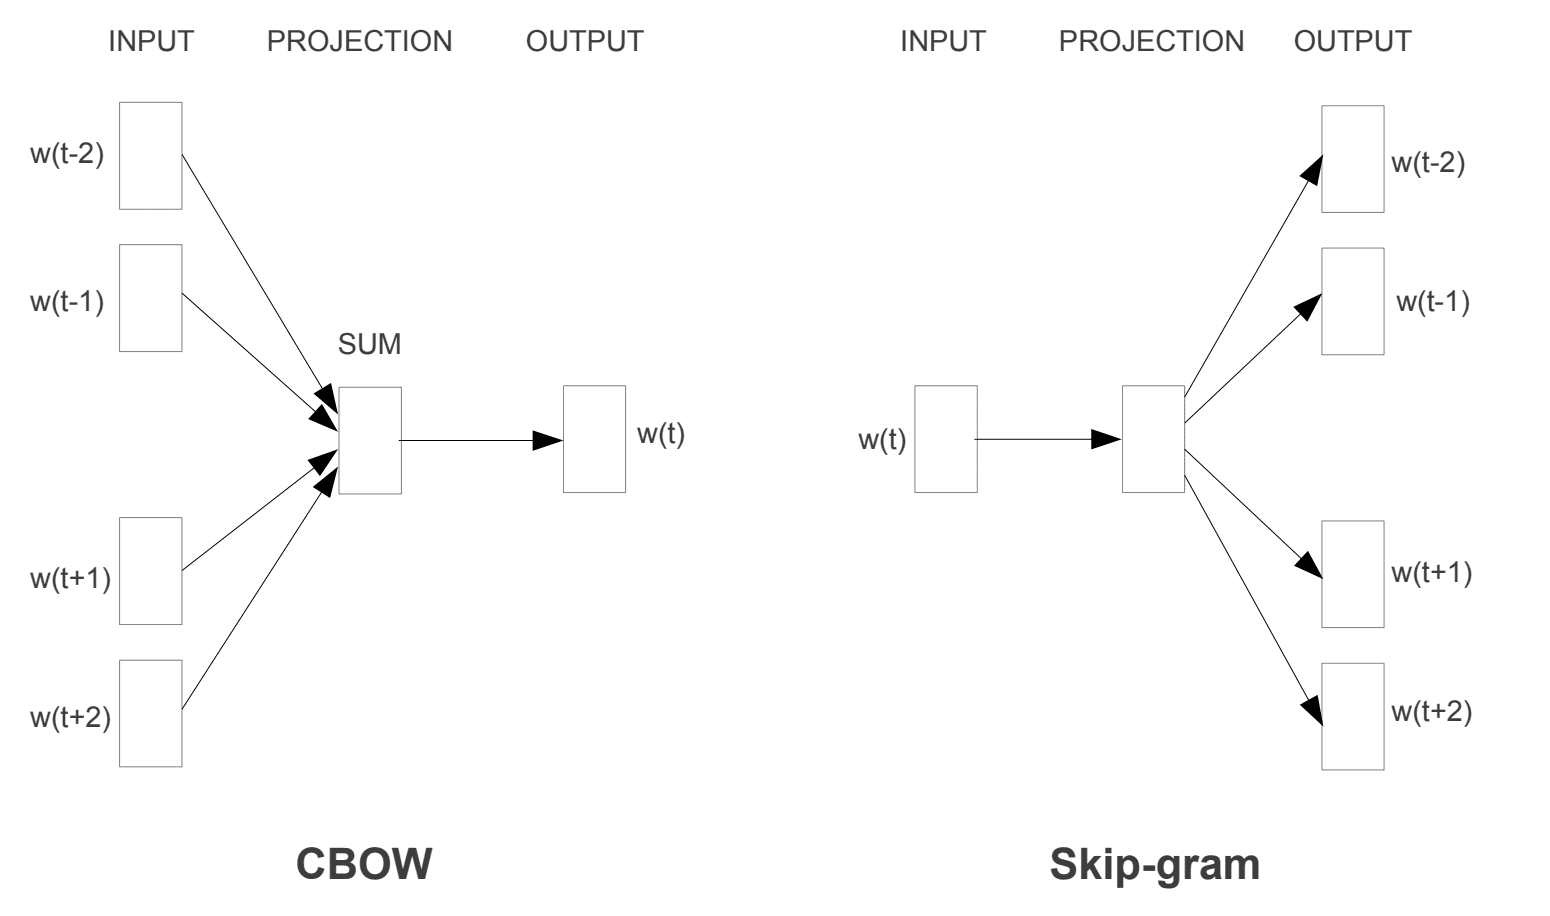

Далее будем считать, что есть 2 матрицы представлений, $V, U \in \mathbf{R}^{|W|\times m}$ - матрица представлений и дополнительных представлений.


Почему две матрицы:
- Не накладываем дополнительного ограничения (симметричность) на входные данные
- Проще считать градиенты — быстрее обучаемся

Когда мы говорим про предсказание слова, мы говорим о решении задачи классификации. Мы считаем, что вероятность одного слова $w$ при условии слова $v$ можно посчитать как $softmax_{w \in W} (U_w^T V_{v})$. $U_i$, $V_j$ означают $i$ и $j$ строку матриц $V$, $U$ соотвественно, то есть $U_i V_j^T$ - скалярное произведение.

**Функционал CBOW**

Как и выше, будем считать, что $C(w_i)$ контекст слова $w_i$, например $k$ слов слева и справа.

\begin{align*}
&\sum_{i}^N \log p(w_i | C(w_i)) \to \max_{U, V}\\
&p(w | C(w_i)) = softmax_{w \in W}(U_w v^T)\\
&v = \frac{1}{|C(w_i)|} \sum_{w \in C(w_i)} V_w
\end{align*}

**Функционал Skip-Gram**


\begin{align*}
&\sum_{i}^N  \sum_{w \in C(w_i)} \log p(w | w_i) \to \max_{U, V}\\
&p(w | w_i) = softmax_{w \in W}(U_w V_{w_i}^T)\\
\end{align*}


**Замечание**

- На практике skip-gram намного лучше моделируют редкие слова

- Skip-gram на практике намного медленее CBOW

- Есть методы ускорения обучания: Negative sampling, Hierarchical softmax из работы Distributed Representations of Words and Phrases and their Compositionality [Mikov et Al., 2013](https://arxiv.org/abs/1310.4546), примерно 46 тысяч цитат.


<div>
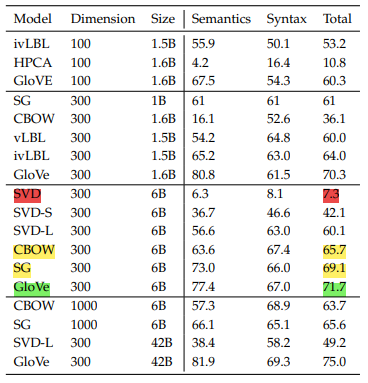
</div>

[Источник таблички](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1224/readings/cs224n-2019-notes02-wordvecs2.pdf)

**На самом деле OHE сводится к эмбеддингам:** После обучения модели, первый линейный слой размера $|W|\times m$ можно будет рассматривать как эмбеддинги слов.

### `Общее замечания на методах основанных на предсказании`

**Преимущества**:

- Маленькая размерность
- Близким словам соответствуют близкие вектора
- Обучаются градиентно по датасету

**Недостатки**

- Плохой механизм обработки новых слов на тесте
- Требуют большего корпуса чем count-based модели

Так как нет возможности добавлять новые слова и необходимость хранения матрицы, этот подход **не** подходит для нейронных сетей и больших датасетов. Нам нужны **масштабируемые** методы.

Удачное расширение skip-gram — модель **FastText**. Для этого предположим, что эмбеддинг слова представляются суммой эмбеддингов его буквенных n-грамм, и будем учить именно их. Это удачно работает с **лингвистической точки зрения**: смысл слова определяется приставкой, корнем, суффиксом и окончанием. Кроме того, мы теперь можем  обрабатывать Out-Of-Vocabulary слова, так как каждое слово состоит из набора слогов.

### `Fast-Text`

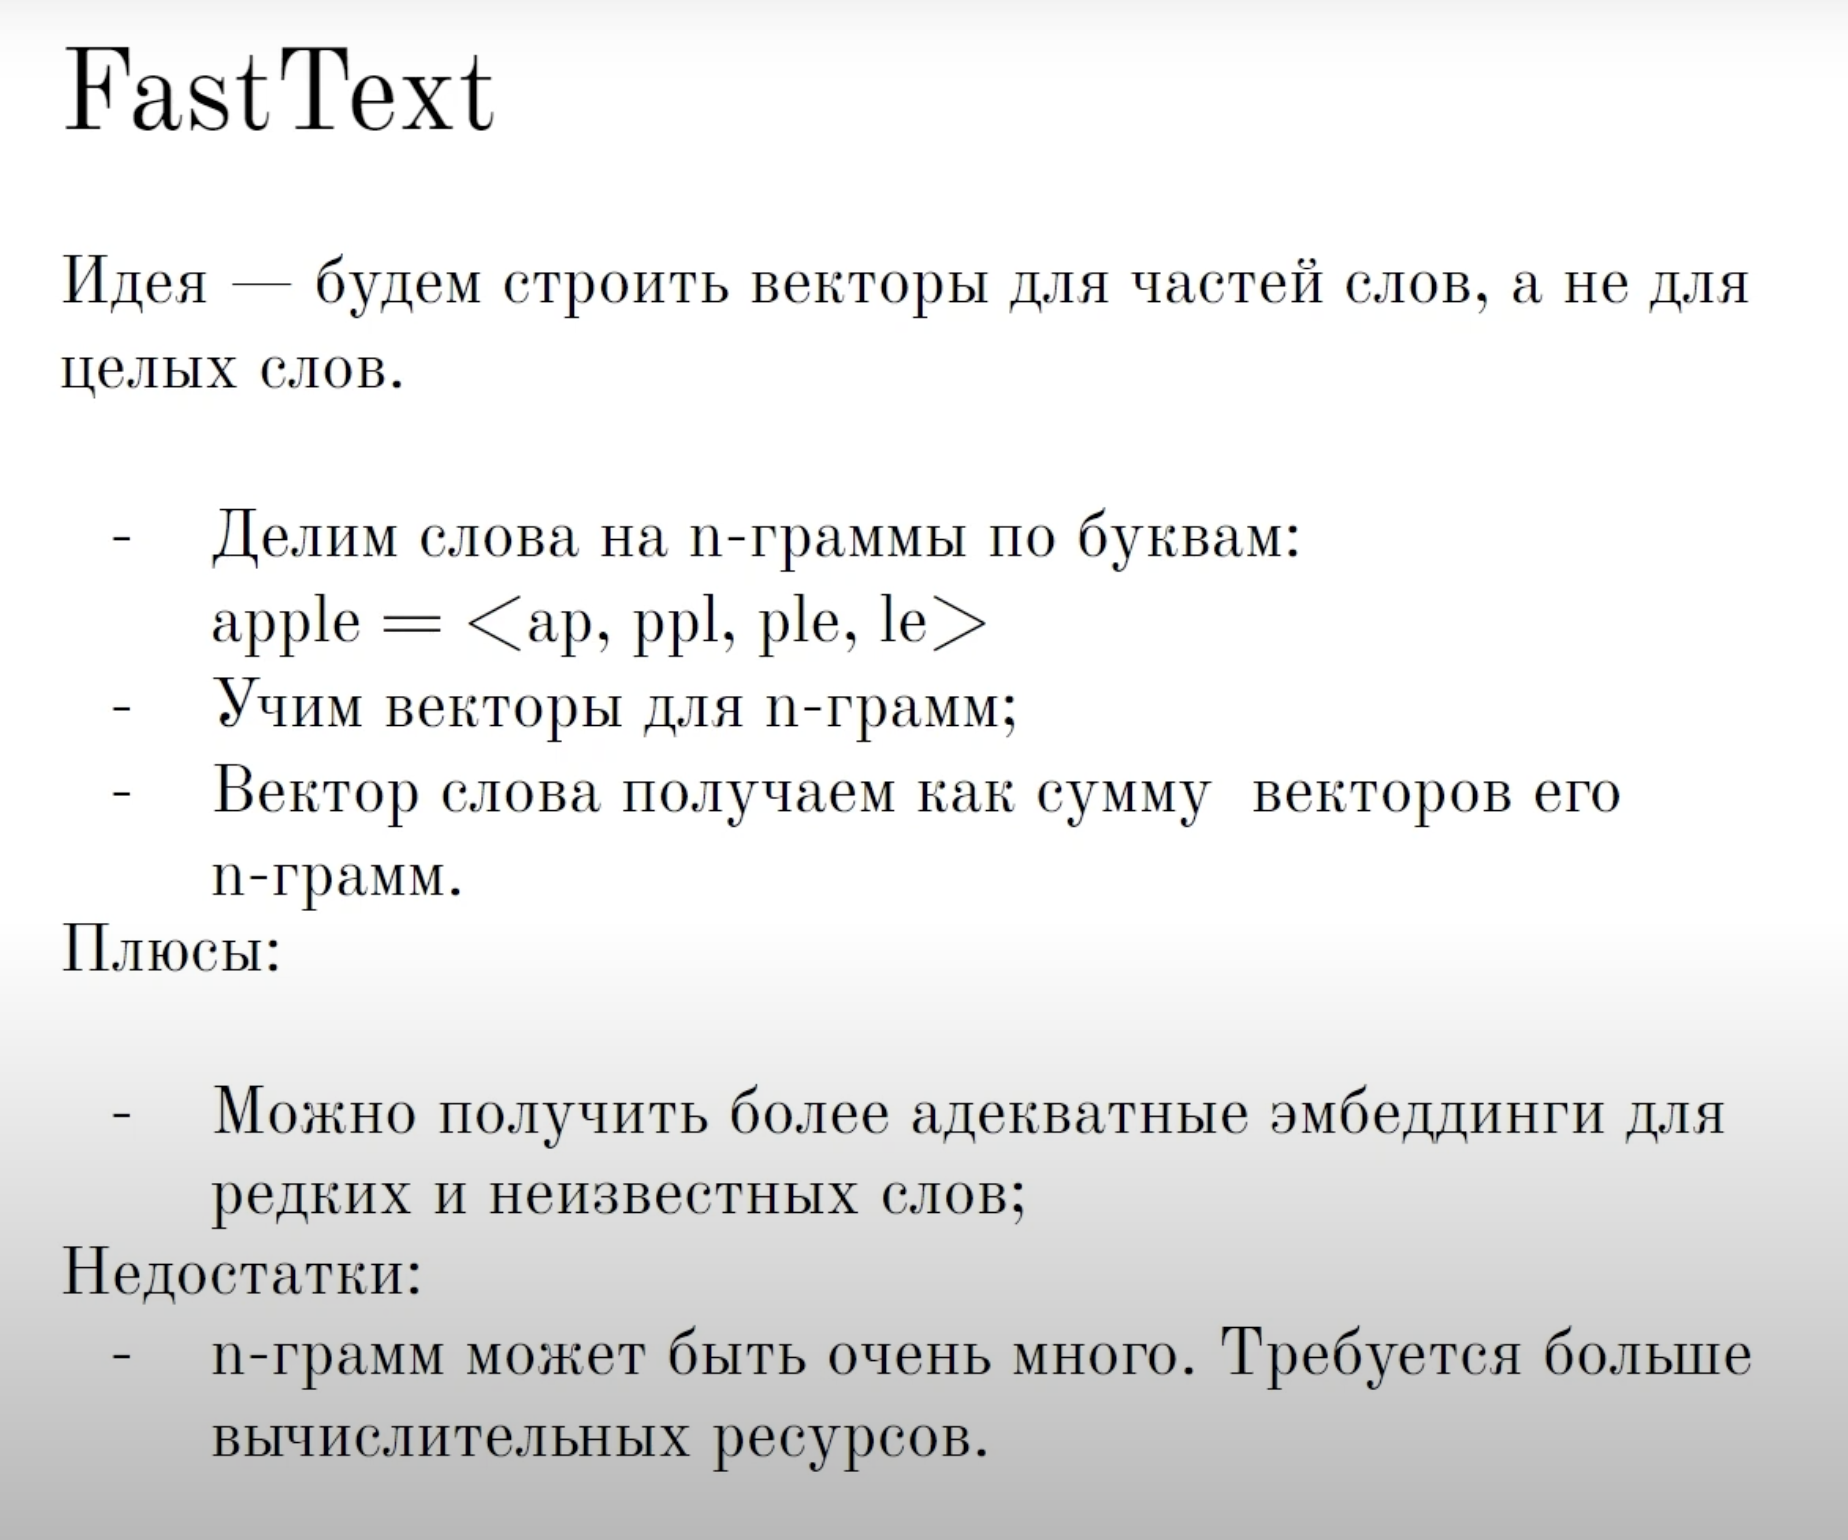

[Источник](https://www.youtube.com/watch?v=RKGi26Yk-5A&t=12s)

### `Byte-Pair Encoding (BPE)`

**Основная идея:** Будем строить словарь иерархически.

1. Изначально слова рассматриваются посимвольно

2. Подсчитываются пары символов: как часто пары символов идут подряд

3. Находится самая частая пара

4. Пара символовом объединяется в новый символ

5. Если получили достаточно большой словарь, то заканчиваем. Иначе идем в пункт 2.

По итогу, получаем словарь, где мы учитываем популярные сочетания букв/слогов/слов.

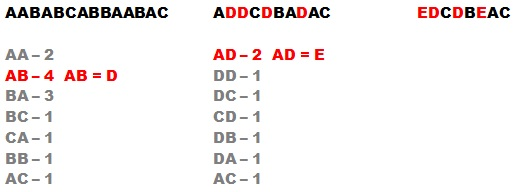

[Источник](https://alexanderdyakonov.wordpress.com/2019/11/29/%D1%82%D0%BE%D0%BA%D0%B5%D0%BD%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F-%D0%BD%D0%B0-%D0%BF%D0%BE%D0%B4%D1%81%D0%BB%D0%BE%D0%B2%D0%B0-subword-tokenization/)

Плюсом данного подхода, заключается то, что мы избавляемся почти от всех проблем мешка слов, а именно размера словаря и ограниченности тренировочной выборки, в которую могут не попасть какие-то слова из тестовой. Конечно, это не решает все проблемы, но упрощает задачу.

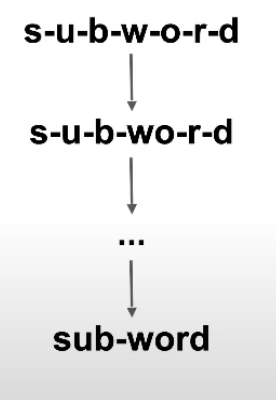

[Источник](https://www.youtube.com/watch?v=WbtQzAvhnRI&t=1536s)

## `Эмбеддинги — векторные представления слов`

## `Интерпретация эмбеддингов с использованием косинусной меры сходства`

Для измерения сходства двух слов можно использовать предположение о близости по некоторой метрике их эмбеддингов.

Рассмотрим косинусную меру сходства
:
$$\text{CosineSimilarity(u, v)} = \frac {u \cdot v} {||u||_2 ||v||_2} = cos(\theta) \tag{1}$$

$\theta$ — угол между векторами $u$ и $v$.

<div>
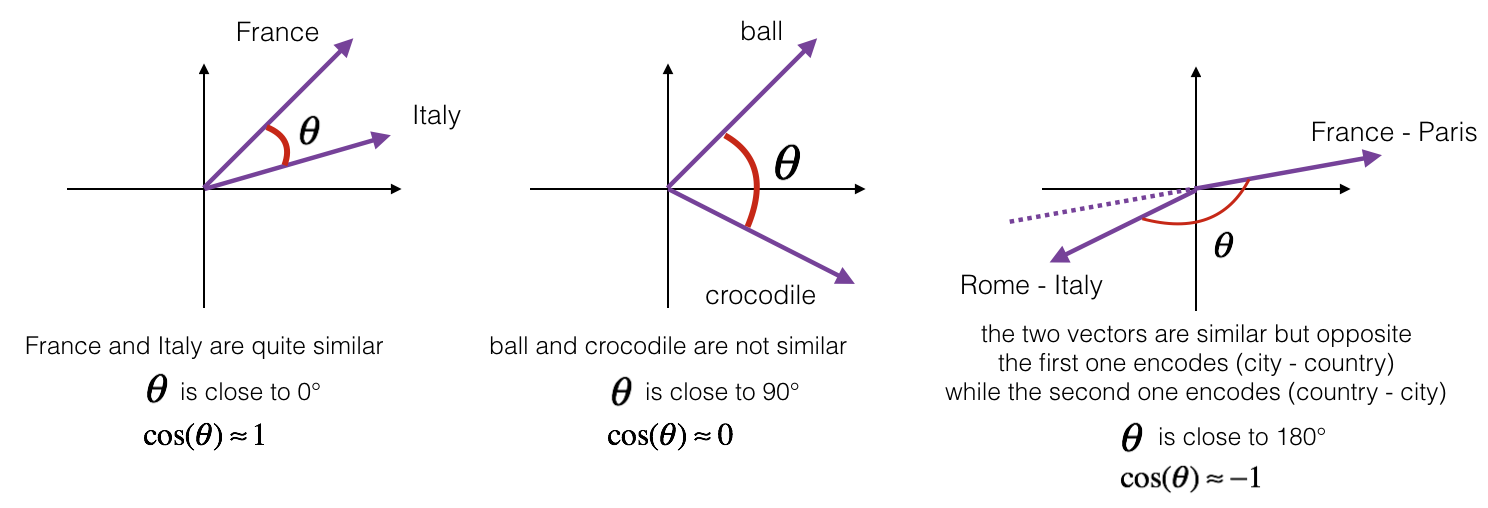
</div>

**Используем, что для нового неизвестного токена его представление будет нулевым:**

С помощью той же функции можем искать 10 самых схожих объектов с некоторым словом.

Так как
$$
\text{cosine}(w-\mathbb{0},u-\mathbb{0}) = \text{cosine}(w,u)
$$

## `Арифметика в поле эмбеддингов`

Основное свойство, которое мы хотим получить от эмбеддингов -- это возможность складывать и вычитать векторы эмбеддингов так, чтобы они переходили в такие же эмбеддинги по смыслу. Давайте рассмотрим изображения

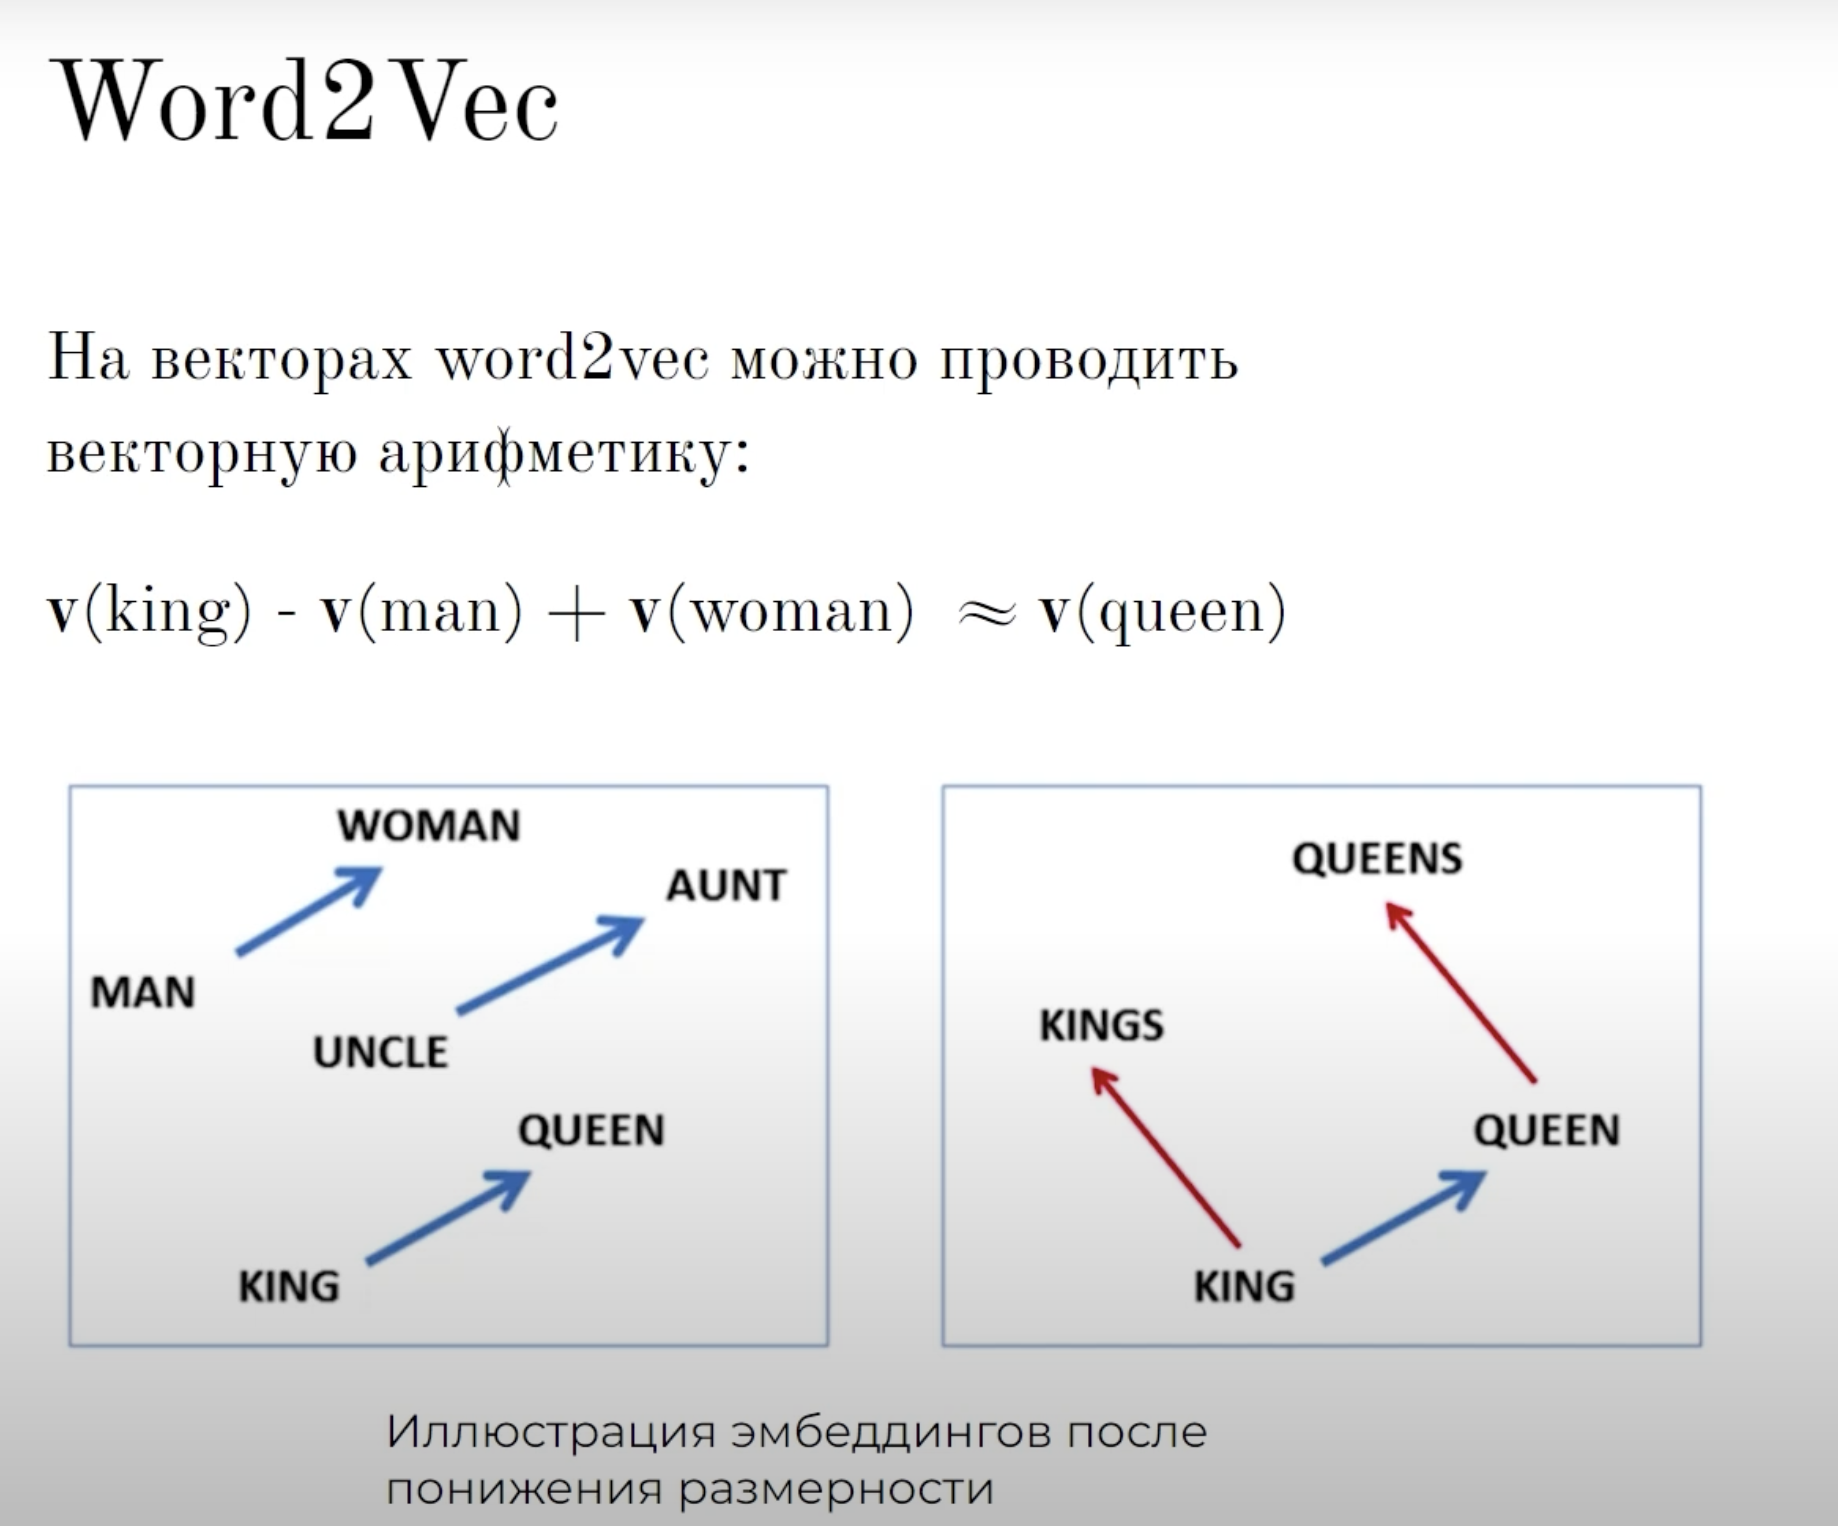

[Источник](https://www.youtube.com/watch?v=WbtQzAvhnRI&t=1536s)

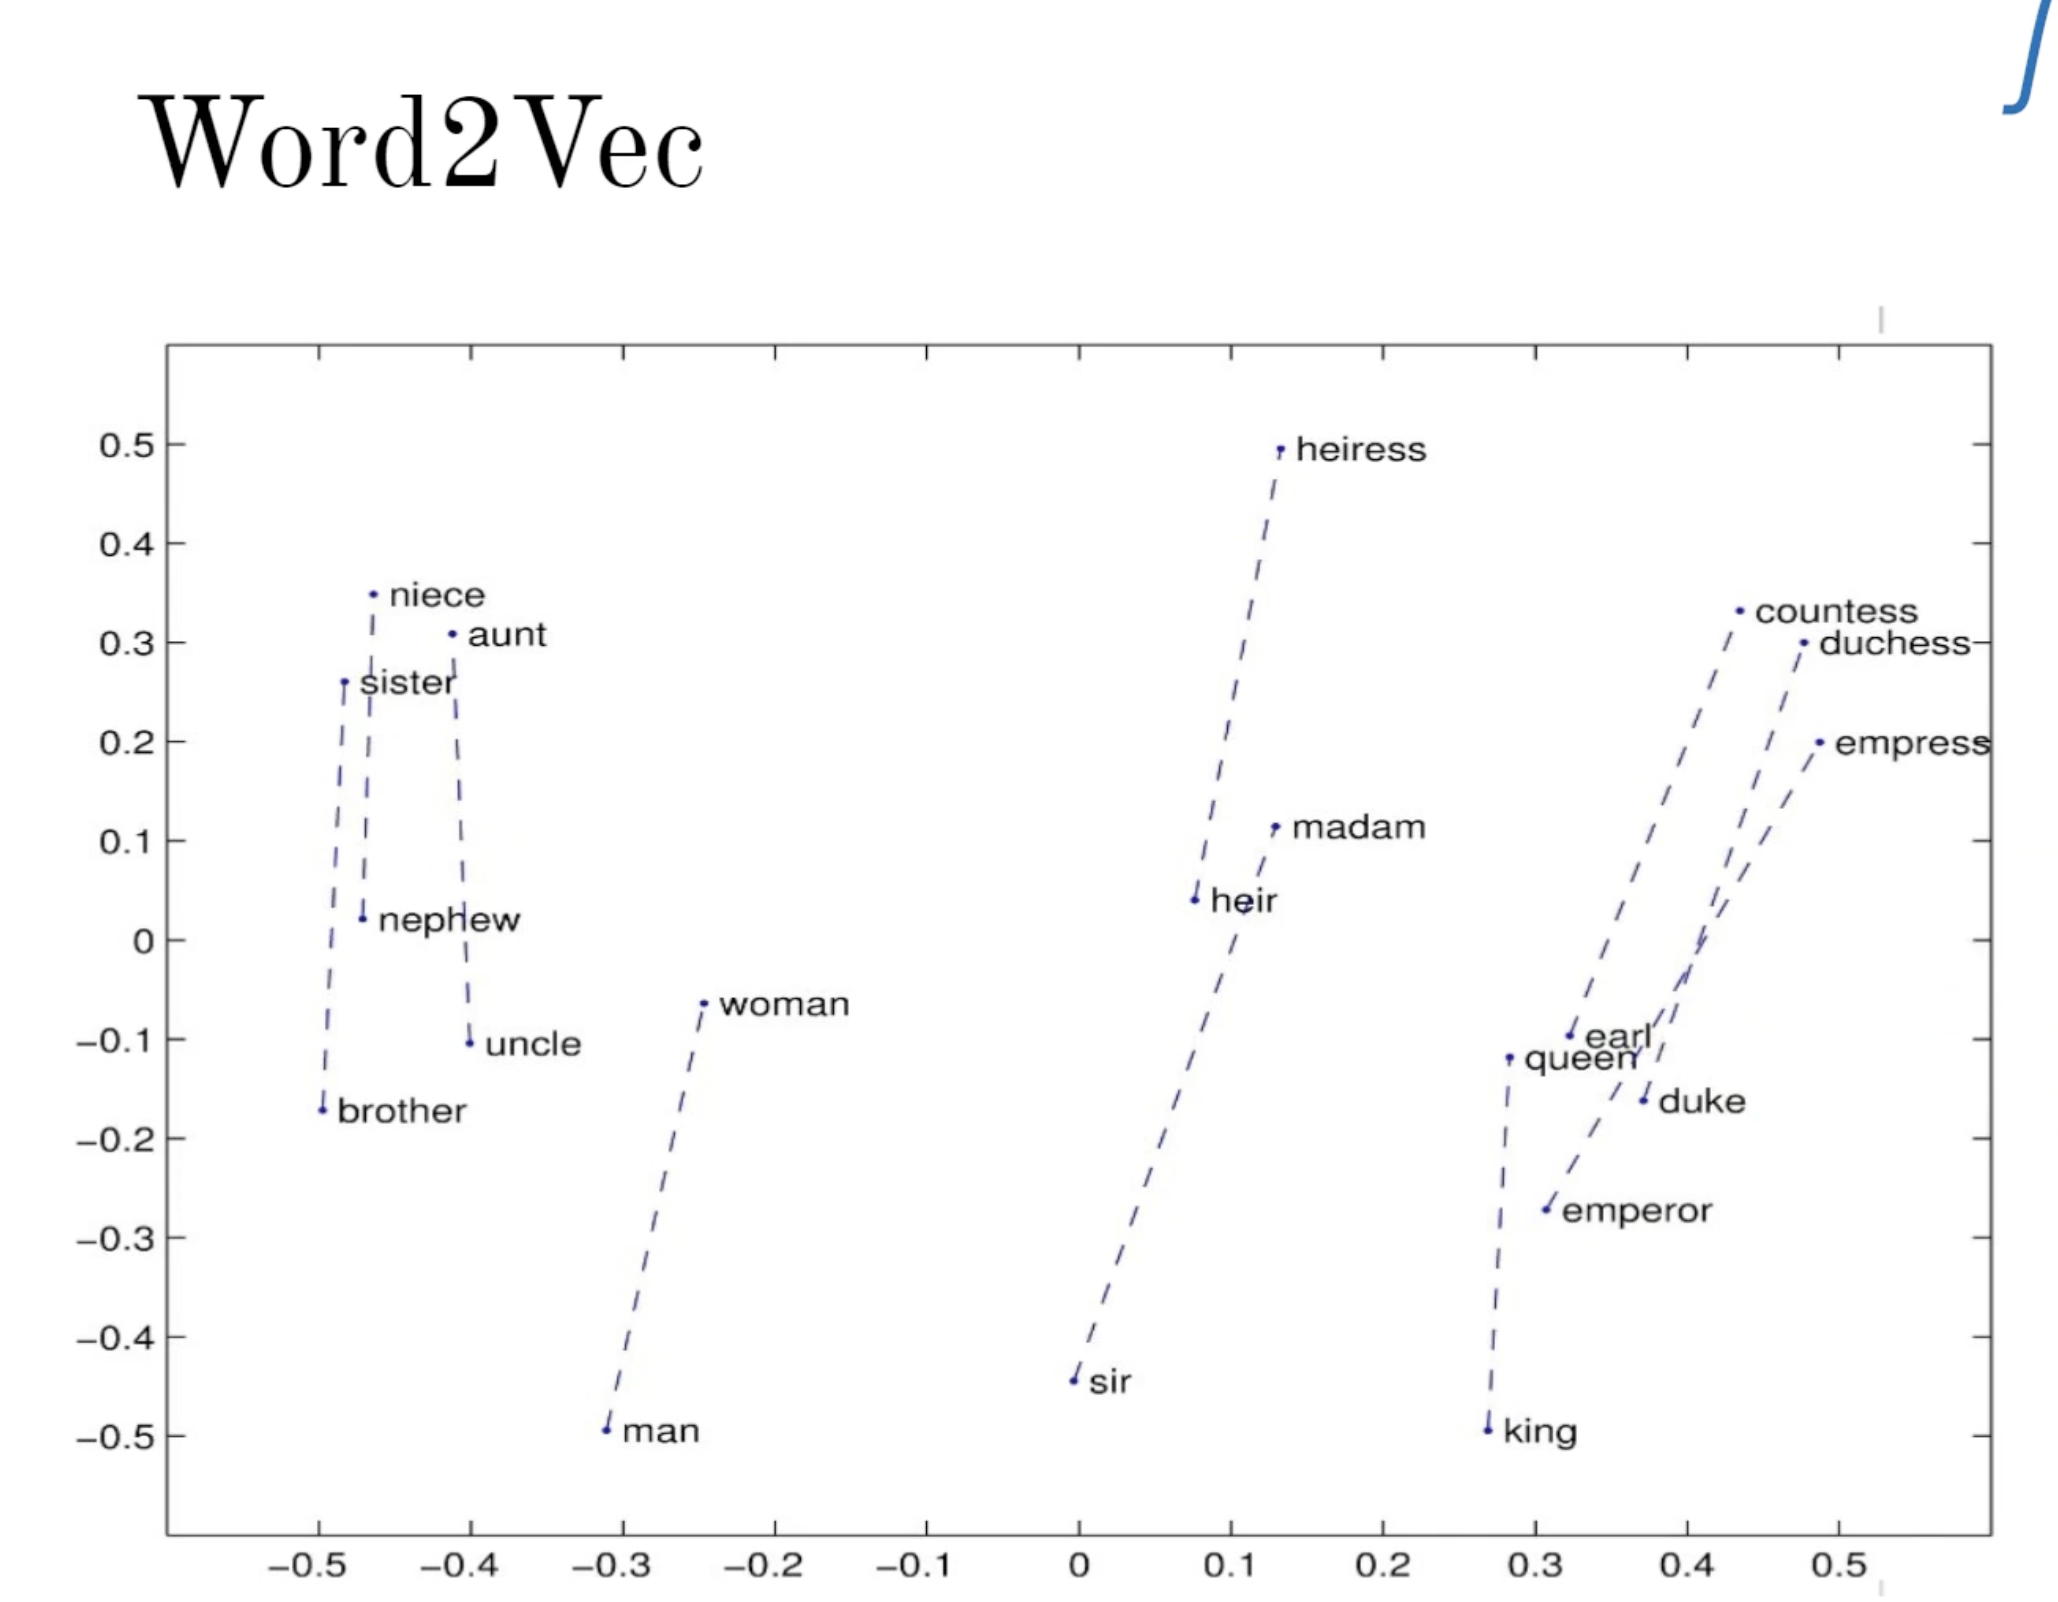

[Источник](https://www.youtube.com/watch?v=WbtQzAvhnRI&t=1536s)

## `Сравнение методов`

Мы сегодня рассмотрели достаточно простые методы создания эмбеддингов, но достаточно эффективные, если посмотреть на изображение ниже, то можно увидеть незначительное отставание GloVe даже от XXL моделей. В общем данные подходы являются очень сильными бейзлайнами.

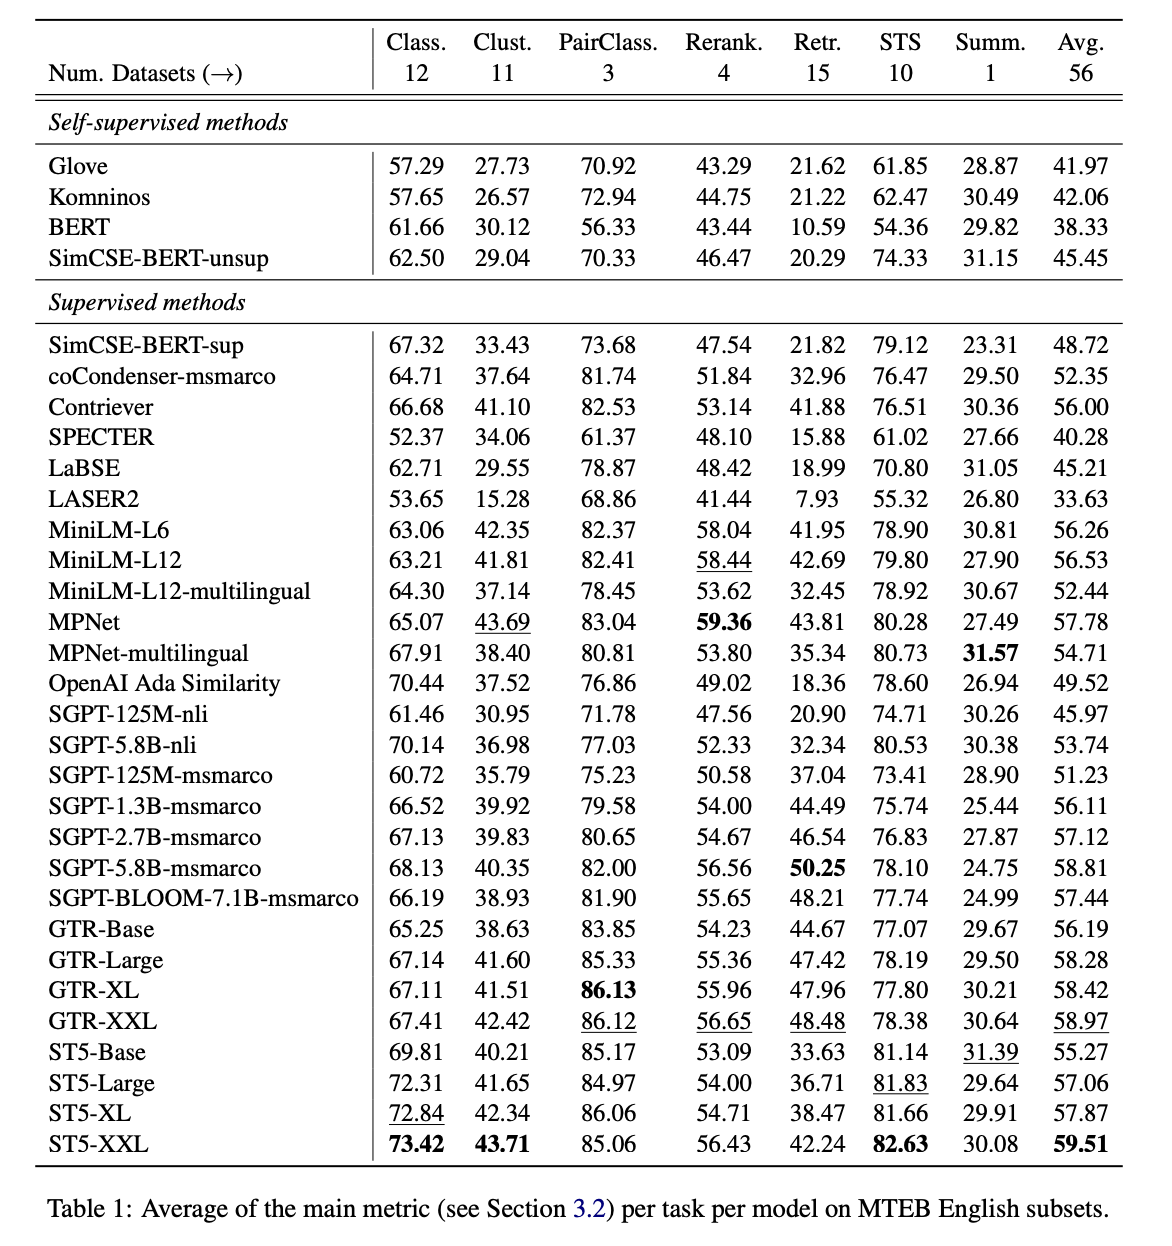

[Источник](https://arxiv.org/pdf/2210.07316)

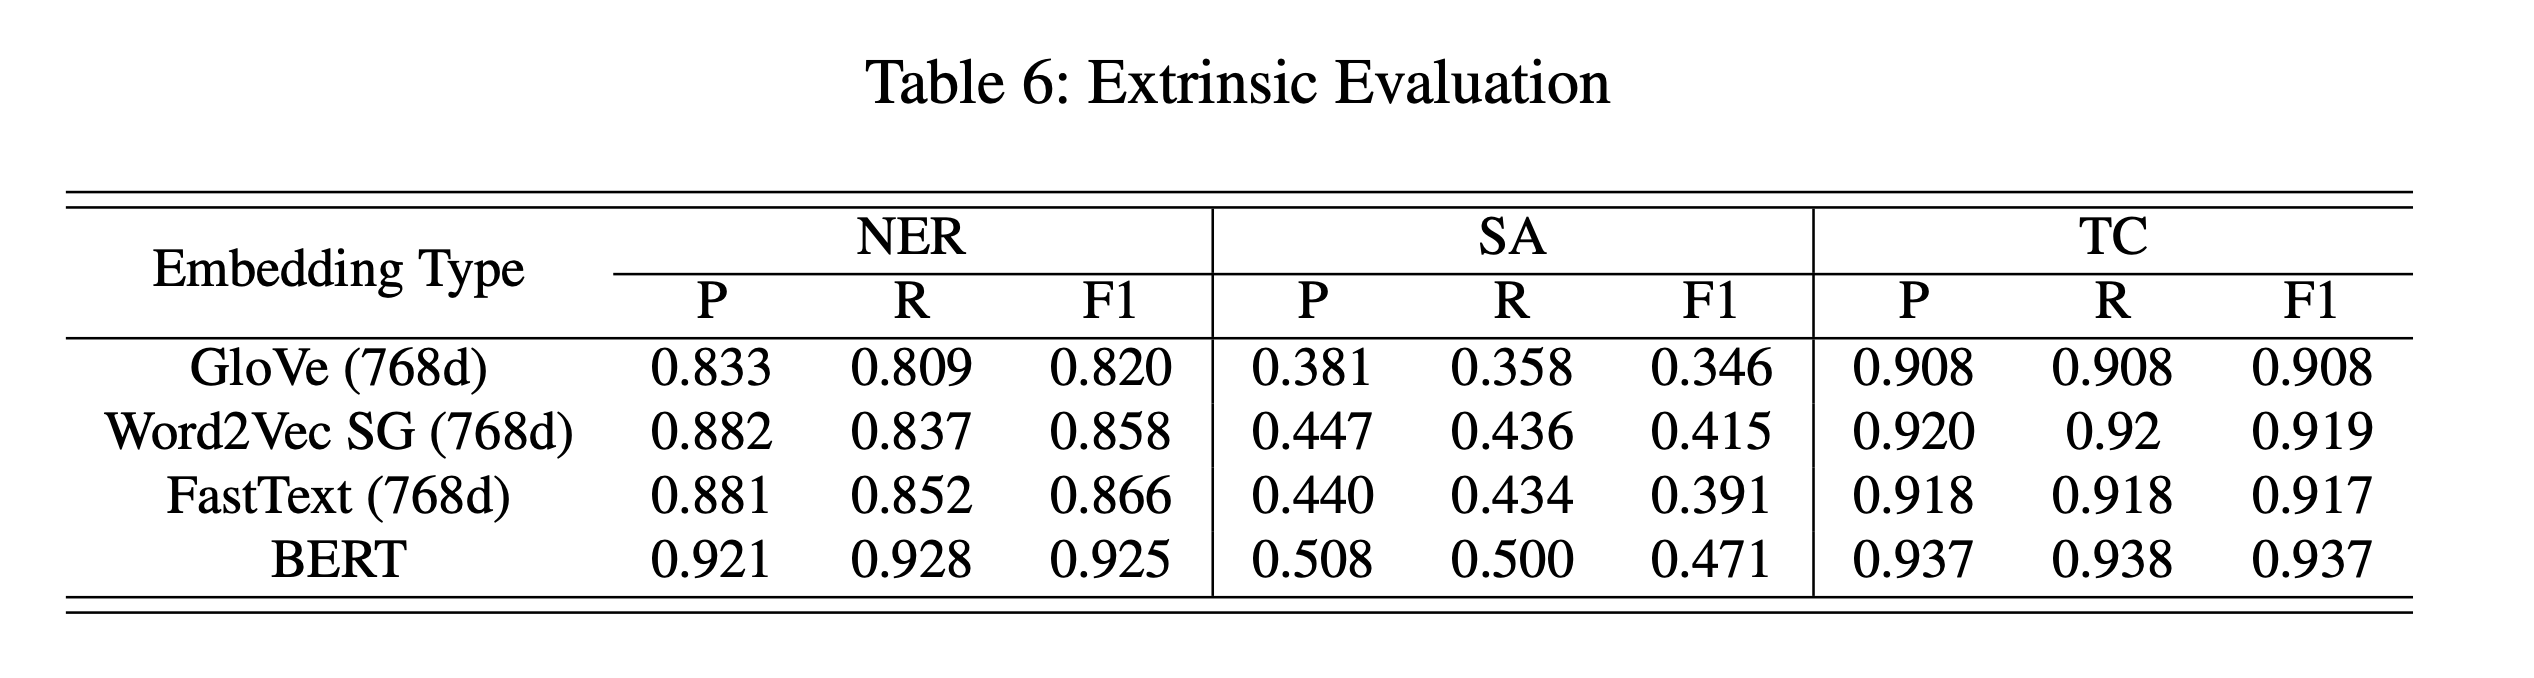

[Источник](https://hal.science/hal-03148517/document)

## `Эмбеддинги в pytorch`

Самый простой  и лучший' (в смысле некоторой обучаемой модели, а не семантической интерпретируемости) способ обучить эмбеддинги — инициализировать векторы случайным образом, а затем пропускать по ним градиент. Т.е. рассматривать как обучаемый параметр при прямом проходе сети. Также отлично работает инициализация известными эмбеддингами, теми же Glove и Fasttext

```python
torch.nn.Embedding(
    num_embeddings: int,
    embedding_dim: int,
    padding_idx: Optional[int] = None,
    max_norm: Optional[float] = None,
    norm_type: float = 2.0,
    scale_grad_by_freq: bool = False,
    sparse: bool = False,
    _weight: Optional[torch.Tensor] = None,
    _freeze: bool = False,
    device=None,
    dtype=None,
) -> None
```

**Инициализация Эмбеддингов: класс `torch.nn.Embedding`**

* `num_embeddings` (int) – размер словаря (количество слов, требующих эмбеддингов). Включает в себя спец. слова. Можно передавать `vocab.__len__`

* `embedding_dim` (int) – размерность изучаемого представления.

* `padding_idx` (int, optional) – если указан, то вектор соответствующий этому токену обучаться не будет, по умолчанию будет равен 0.

**Важно!** padding_idx используется для обособления начала/конца строки. Векторы других спец символов, например `<unk>`, обучаться будут.

* `max_norm` (float, optional) – максимальная норма векторного представления, если таковая указана.

* `norm_type` (float, optional) – параметр нормы (p-norm).

* `scale_grad_by_freq` (bool, optional) – Если True, то градиенты будут считаться с учётом частоты слова в мини-батче.

* `sparse` (bool, optional) – Если `True`, то градиент по матрице эмбеддингов будет вычисляться в sparse виде. (Нужно, например, если вы захотели дообучить некоторые из приведённых ранее эмбеддингов)


Самое простое, что можно сделать, это использовать только эмбеддинги слов без какой-либо нейронной сети поверх них. Чтобы получить векторное представление текста, мы можем либо просуммировать все эмбеддинги токенов, либо использовать взвешенную сумму этих эмбеддингов (с весами, например, tf-idf или чем-то другим). Но в таком случае мы теряем информацию о контексте, то есть о порядке слов, а учитывание этого порядка слов и есть наш inductive bias и мы очень хотим из этого доставать какую-то информацию.

Да это проблема, но с ней мы разберемся уже на следующей неделе